In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv('archive (3).zip')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [9]:
len(df['title'].unique())

148

In [10]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [11]:
x=df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [12]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [13]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

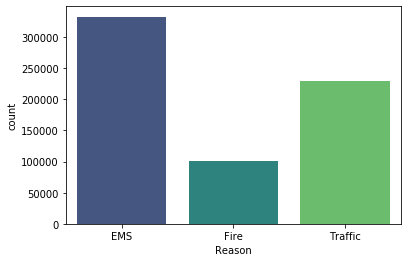

In [14]:
sns.countplot(df['Reason'],palette='viridis')

In [15]:
type(df['timeStamp'][0])

str

In [16]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
time=df['timeStamp'][0]
time.hour

17

In [18]:
time

Timestamp('2015-12-10 17:10:52')

In [19]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [21]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
y=df['dayofweek'][0]
dmap[y]

'Thu'

In [23]:
df['dayofweek']=df['dayofweek'].apply(lambda day:dmap[day])

In [24]:
df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

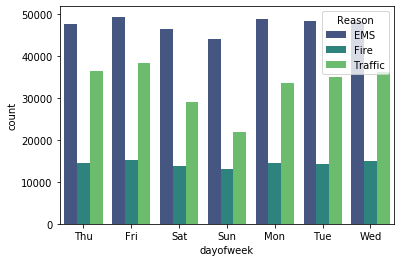

In [25]:
sns.countplot(x=df['dayofweek'],data=df,hue=df['Reason'],palette='viridis')

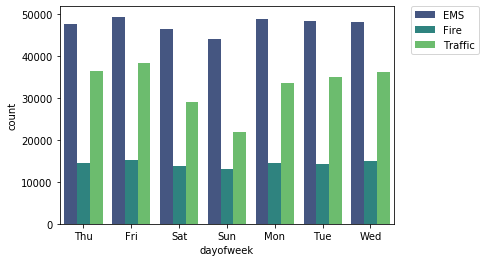

In [26]:
sns.countplot(x=df['dayofweek'],data=df,hue=df['Reason'],palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [27]:
bymonth=df.groupby(df['month']).count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


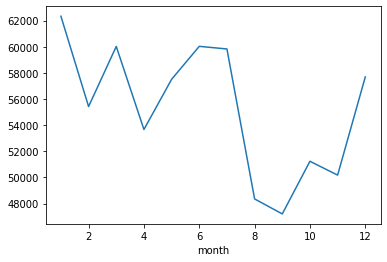

In [28]:
bymonth['lat'].plot()

No handles with labels found to put in legend.


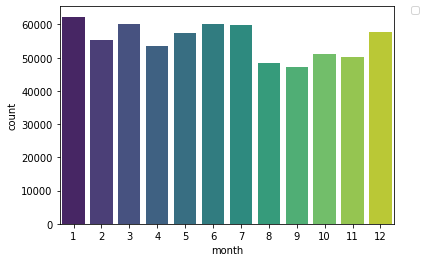

In [29]:
sns.countplot(x=df['month'],data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

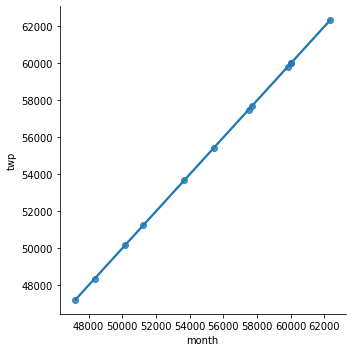

In [36]:
#bymonth1=bymonth.reset_index()
sns.lmplot(x='month',y='twp',data=bymonth)


In [39]:
x=df['timeStamp'][0]
x.date()

datetime.date(2015, 12, 10)

In [41]:
df['date']=df['timeStamp'].apply(lambda time:time.date())
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

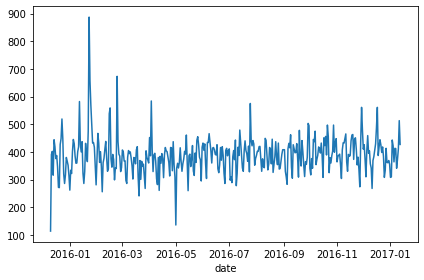

In [52]:
df.groupby('date').count().lat.head(400).plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

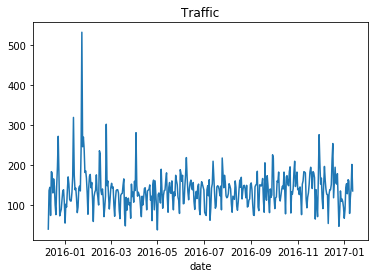

In [55]:
df[df['Reason']=='Traffic'].groupby('date').count().lat.head(400).plot()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

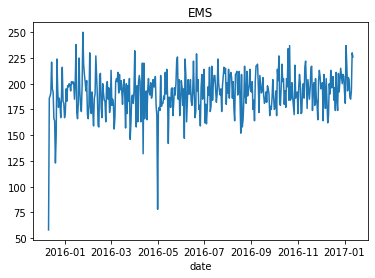

In [56]:
df[df['Reason']=='EMS'].groupby('date').count().lat.head(400).plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

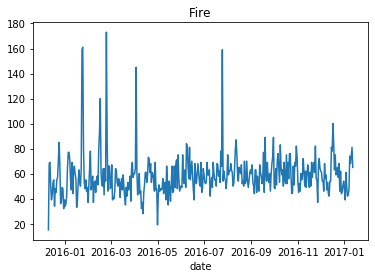

In [57]:
df[df['Reason']=='Fire'].groupby('date').count().lat.head(400).plot()
plt.title('Fire')

In [60]:
df1=df.groupby(by=['dayofweek','hour']).count().unstack()
df1

lat                                                        ...  \
hour         0     1     2     3     4     5     6     7     8     9   ...   
dayofweek                                                              ...   
Fri        1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  ...   
Mon        1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  ...   
Sat        2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  ...   
Sun        2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  ...   
Thu        1731  1408  1426  1236  1293  1775  2816  4432  5297  5412  ...   
Tue        1720  1459  1322  1213  1247  1741  2784  4425  5634  5566  ...   
Wed        1664  1484  1259  1265  1128  1609  2668  4644  5469  5444  ...   

           date                                                        
hour         14    15    16    17    18    19    20    21    22    23  
dayofweek                                                              
Fri        6394  7040  7065  7113  5668  5056  4375  3913  3422  2834  
Mon        5713  6289  6346  6408  5441  4488  3823  3254  2658  2072  
Sat        5421  5181  5211  5213  4980  4753  4127  3895  3226  2965  
Sun        4744  4475  4560  4505  4402  4135  3748  3161  2629  2323  
Thu        6079  6493  6375  6935  5512  4703  4045  3490  2844  2354  
Tue        5926  6252  6495  6883  5628  4621  3845  3409  2708  2137  
Wed        6069  6533  6745  7062  5691  4686  4116  3537  2826  2207  

[7 rows x 288 columns]

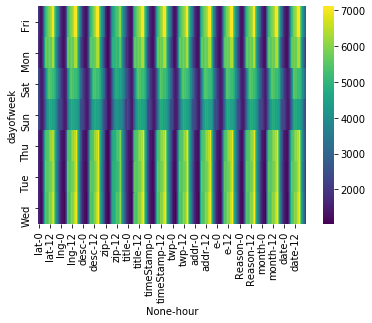

In [66]:
sns.heatmap(df1,cmap='viridis')

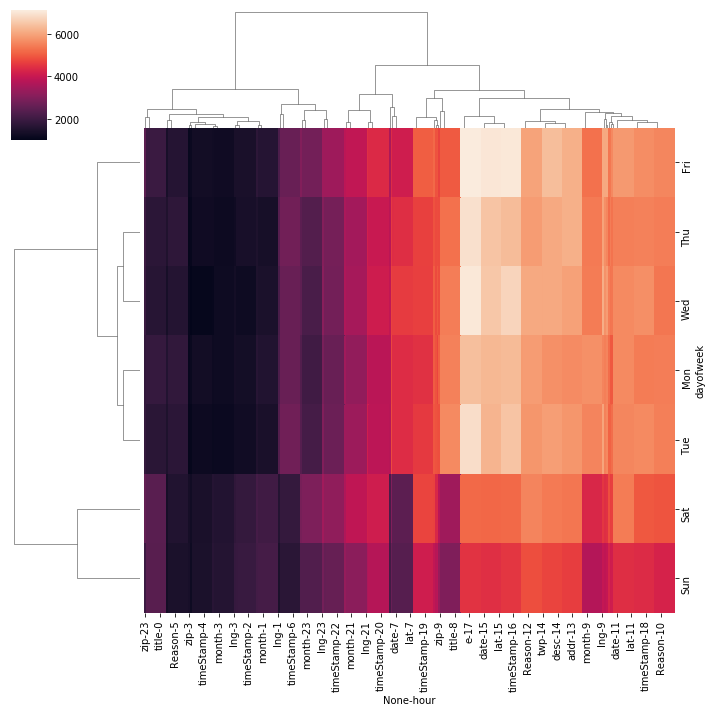

In [67]:
sns.clustermap(df1)

In [71]:
df2=df.groupby(by=['dayofweek','month']).count()['Reason'].unstack()
df2

month,1,2,3,4,5,6,7,8,9,10,11,12
dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


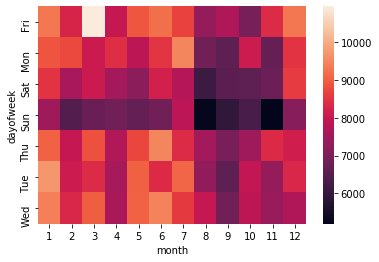

In [72]:
sns.heatmap(df2)

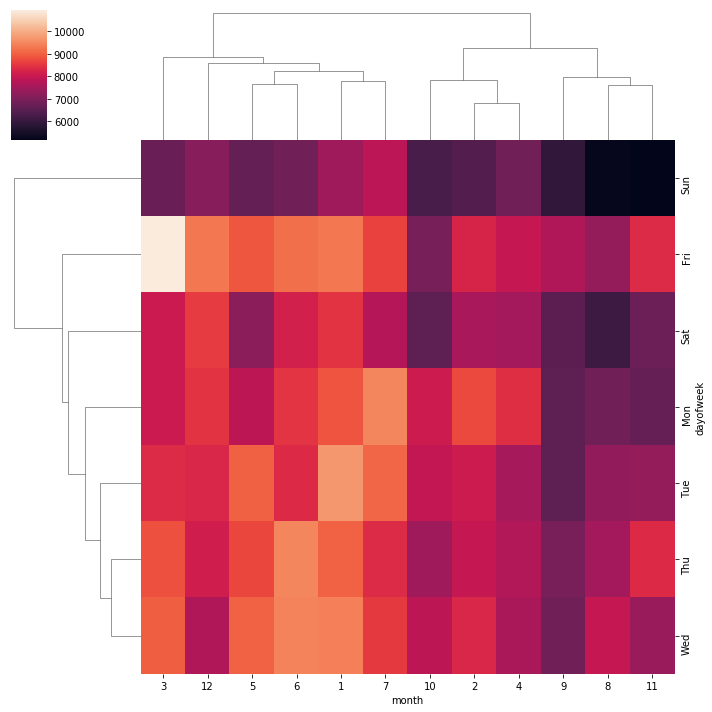

In [73]:
sns.clustermap(df2)